<a href="https://colab.research.google.com/github/kohenro19/ml-pytorch-001/blob/main/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%AE%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なライブラリをインポート
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# matplotlibのインライン表示設定とスタイル設定
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
# ランダムシードを固定（再現性のため）
# シード値とは、乱数を生成するときに最初に設定する値のことです。乱数を生成するときに、
# このシード値を設定しておくと、再現性のある乱数を得ることができます。
torch.manual_seed(123)

In [ ]:
# 直線のパラメータとデータ生成用のx軸の値を設定
# torch.linspace(0, 5, 100) は、0から5までの範囲を100等分した値を持つテンソルを生成します。これは、直線を描くためのx軸の値になります。
# .view(100, 1) は、生成したテンソルの形状を (100, 1) に変換します。これは、100個の要素を持つ1列のテンソルを作成するためです。

a = 3
b = 2
x = torch.linspace(0, 5, 100).view(100, 1)

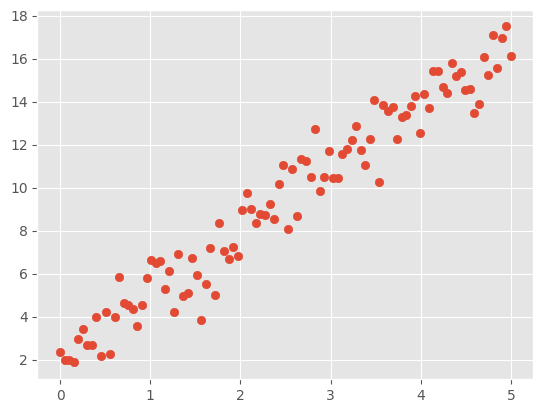

In [ ]:
# ノイズを生成し、y軸の値を計算
eps = torch.randn(100, 1)
y = a * x + b + eps

# xとyの散布図を表示
plt.scatter(x, y)

In [ ]:
# 単純な線形回帰モデルを定義
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)  # 線形層を定義
    def forward(self, x):
        output = self.linear(x)  # 入力xに対して線形変換を適用
        return output

# %%
# モデルのインスタンスを作成
model = LR()

In [ ]:
# テスト用の入力データを定義
# [[1.0], [2.0]]: 入れ子になったリストで、テンソルの要素を指定しています。ここでは、2つのリストが1次元の配列として含まれており、それぞれのリストには1つの浮動小数点数（1.0と2.0）が含まれている
x_test = torch.tensor([[1.0], [2.0]])

# %%
# モデルにテストデータを入力して出力を確認
model(x_test)

tensor([[-0.4981],
        [-1.2797]], grad_fn=<AddmmBackward0>)

In [ ]:
!git --version

git version 2.34.1


In [ ]:
# 予測用の新しい入力データを定義
x2 = torch.linspace(0, 3, 100).view(100, 1)
# 新しい入力データのサイズを確認
x2.size()

torch.Size([100, 1])

In [ ]:
# 新しい入力データに対する予測を実行
y_pred = model(x2)

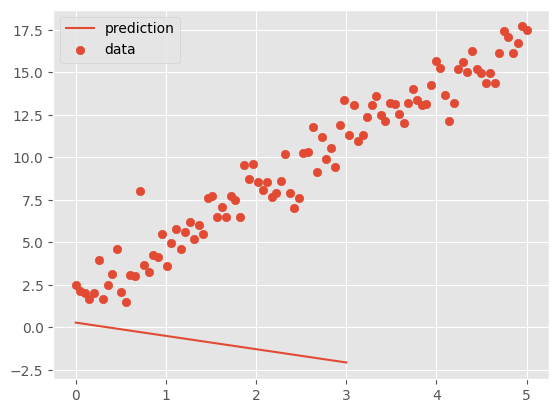

In [ ]:
# 予測結果と元データのプロット
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [ ]:
# 損失関数と最適化手法を定義
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# トレーニングループの準備
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    optimizer.zero_grad()       # 勾配をゼロにリセット
    y_pred = model(x)           # 入力xに対する予測を実行
    loss = criterion(y_pred, y) # 予測と実際の値の間の損失を計算
    loss.backward()             # 勾配を計算
    optimizer.step()            # モデルパラメータを更新
    if epoch % 10 == 0:         # 10エポックごとに損失を出力
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())


epoch: 0, loss: 158.10252380371094
epoch: 10, loss: 109.65029907226562
epoch: 20, loss: 76.15255737304688
epoch: 30, loss: 52.99365234375
epoch: 40, loss: 36.98253631591797
epoch: 50, loss: 25.9130859375
epoch: 60, loss: 18.260082244873047
epoch: 70, loss: 12.96904182434082
epoch: 80, loss: 9.310953140258789
epoch: 90, loss: 6.781832218170166
epoch: 100, loss: 5.033210277557373
epoch: 110, loss: 3.824190616607666
epoch: 120, loss: 2.98823618888855
epoch: 130, loss: 2.4102022647857666
epoch: 140, loss: 2.010479211807251
epoch: 150, loss: 1.734033226966858
epoch: 160, loss: 1.5428181886672974
epoch: 170, loss: 1.4105278253555298
epoch: 180, loss: 1.3189761638641357
epoch: 190, loss: 1.2555910348892212
epoch: 200, loss: 1.2116782665252686
epoch: 210, loss: 1.1812292337417603
epoch: 220, loss: 1.1600909233093262
epoch: 230, loss: 1.145388126373291
epoch: 240, loss: 1.1351362466812134
epoch: 250, loss: 1.127962589263916
epoch: 260, loss: 1.1229172945022583
epoch: 270, loss: 1.11934506893157

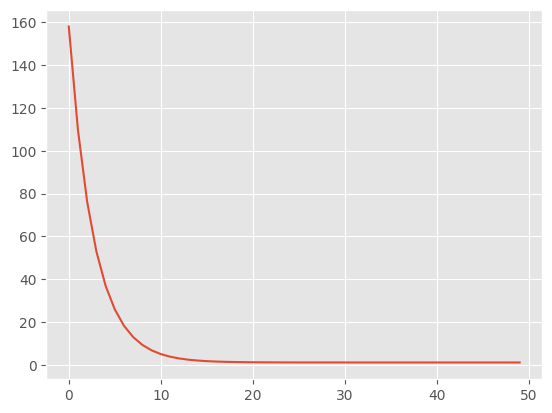

In [ ]:
# エポックごとの損失をプロット
plt.plot(losses)

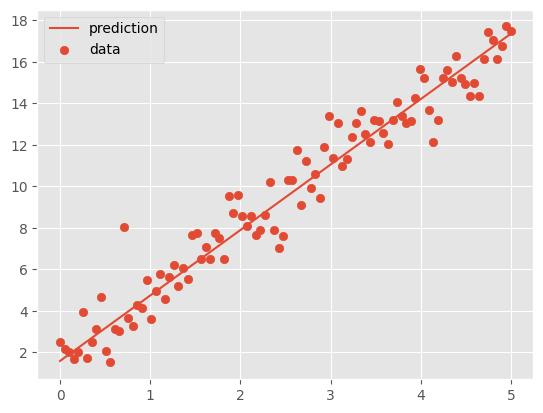

In [ ]:
# トレーニング後の予測をプロット
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()